<a href="https://colab.research.google.com/github/Pornwalaifoxall/python_dataviz2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สอน 1 เมษา 2564

In [ ]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/dataviz_2024_data'

In [ ]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/dataviz_2021_data/search_request.csv'

## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อค้นหาร้านอาหาร ในแต่ละวัน

quiz 6

In [ ]:
data[data['search_timestamp'].dt.dayofweek == 0].shape[0]

1076297

In [ ]:
from matplotlib import pyplot as plt

ส่วนประกอบของกราฟแท่ง


*   ตัวกราฟแท่ง (height)
*   ตำแหน่งกราฟแท่ง (x)
*   ชื่อแท่ง (tick_label)
*   ชื่อกราฟ (plt.title)
*   ชื่อแกน x (plt.xlabel)
*   ชื่อแกน y (plt.ylabel)



In [ ]:
import matplotlib
matplotlib.__version__

'3.2.2'

การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

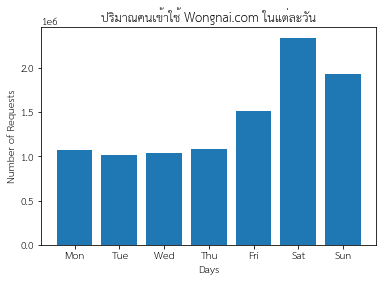

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

Text(0, 0.5, 'Number of Requests')

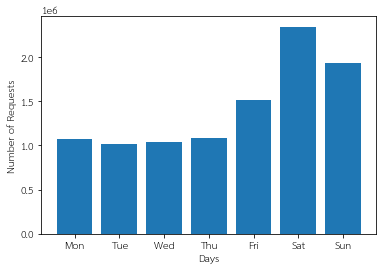

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

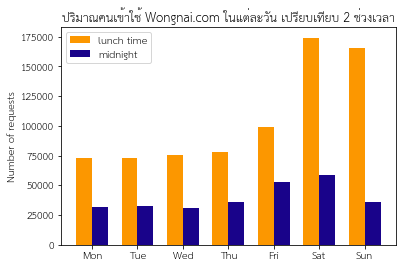

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

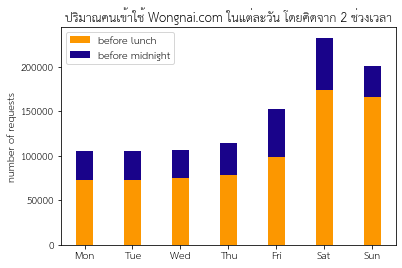

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

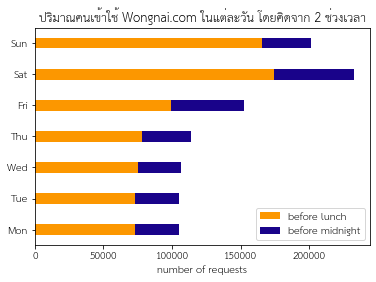

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

(array([  2.,   2.,   2.,   4.,   9.,  14.,  17.,  39.,  47.,  59.,  90.,
        144., 159., 202., 288., 325., 388., 430., 507., 537., 604., 642.,
        650., 615., 590., 546., 534., 507., 429., 357., 323., 233., 196.,
        171., 113.,  73.,  51.,  36.,  26.,  22.,   5.,   3.,   2.,   2.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([ 44.90650513,  47.32901741,  49.7515297 ,  52.17404198,
         54.59655427,  57.01906656,  59.44157884,  61.86409113,
         64.28660341,  66.7091157 ,  69.13162798,  71.55414027,
         73.97665256,  76.39916484,  78.82167713,  81.24418941,
         83.6667017 ,  86.08921398,  88.51172627,  90.93423856,
         93.35675084,  95.77926313,  98.20177541, 100.6242877 ,
        103.04679998, 105.46931227, 107.89182456, 110.31433684,
        112.73684913, 115.15936141, 117.5818737 , 120.00438598,
        122.42689827, 124.84941056, 127.27192284, 129.69443513,
        132.11694741, 134.5394597 , 136.96197198, 139.38448427,
        141.806996

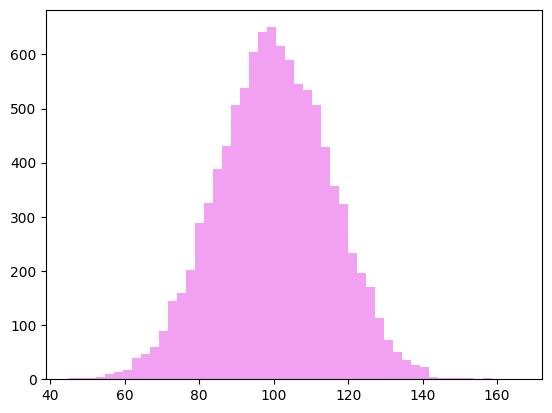

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, facecolor = 'violet', alpha = 0.75)

ตัวอย่างข้อมูล wongnai.com

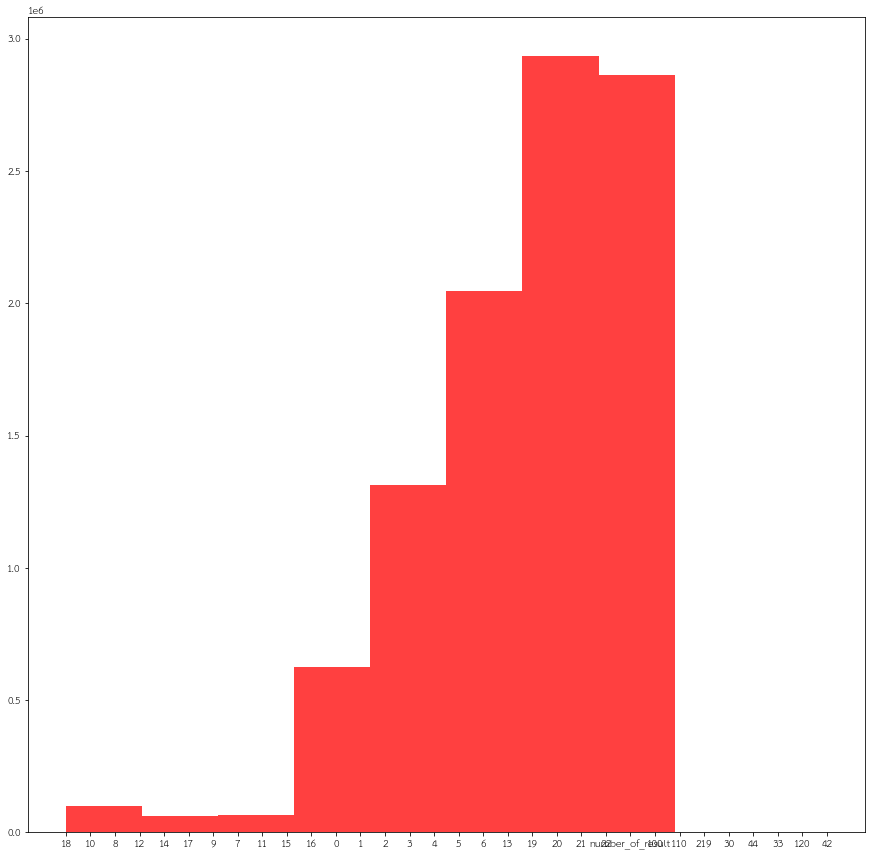

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

True

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [ ]:
new_type = data['number_of_result'].astype('int32')

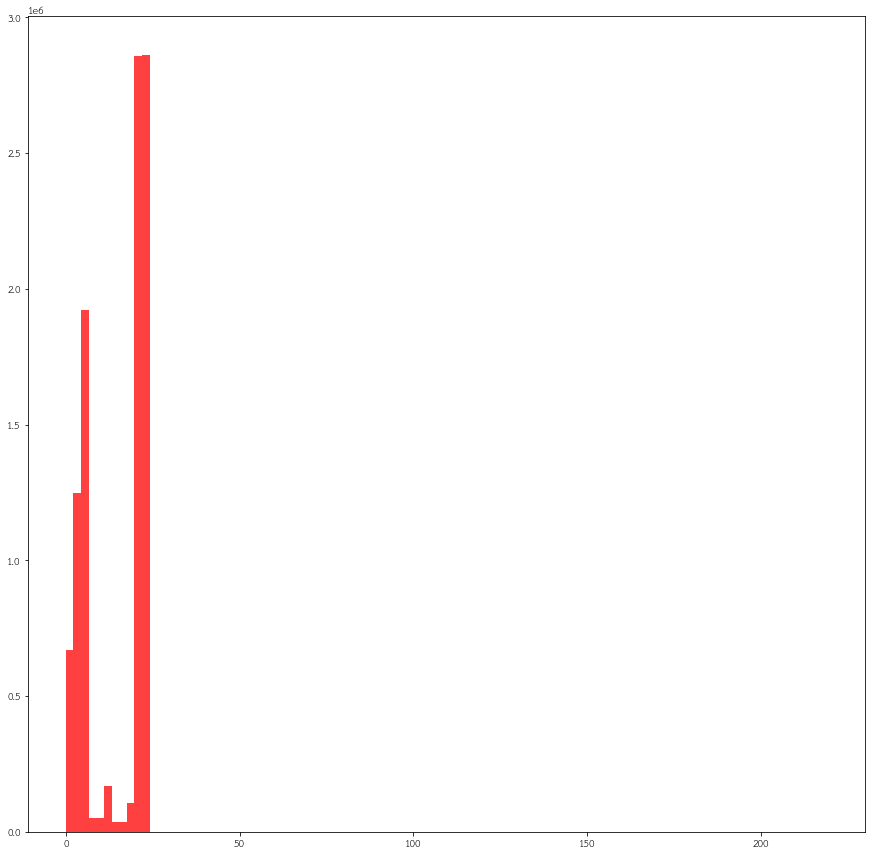

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

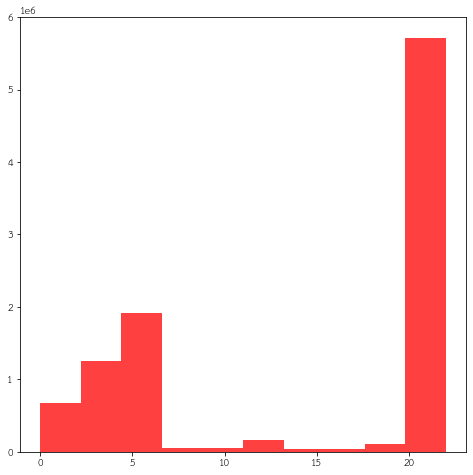

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [ ]:
output[0]

array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
         36883.,   35914.,  105490., 5717238.])

In [ ]:
output[0][-1]

5717238.0

In [ ]:
sum(output[0][:-1])

4287104.0

## Tree map

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

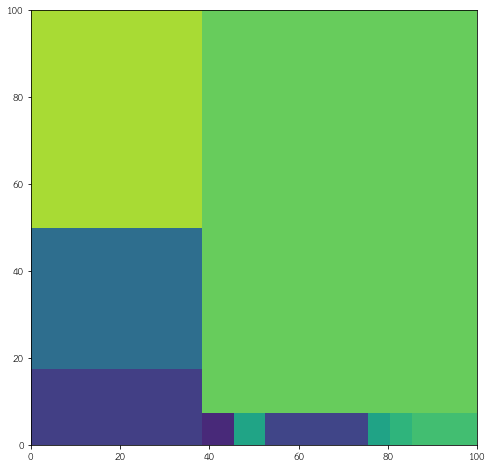

In [ ]:
squarify.plot(output[0])

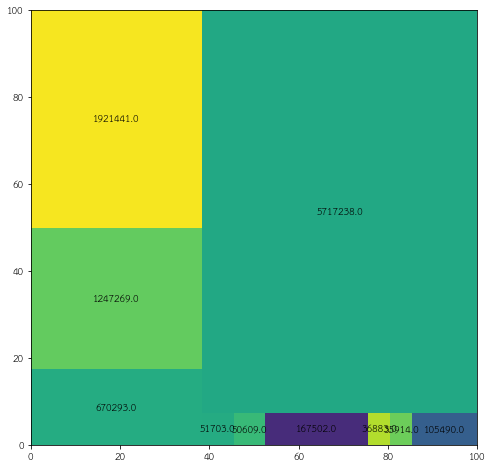

In [ ]:
squarify.plot(output[0],value=output[0])

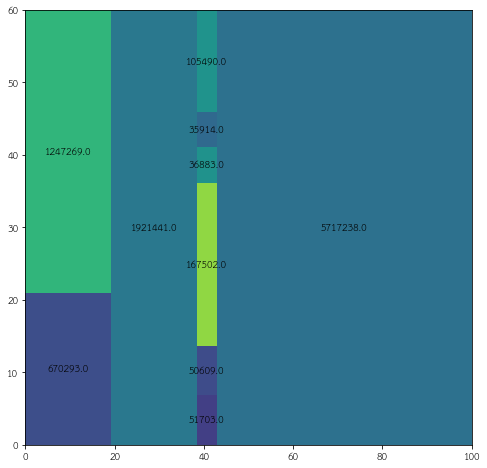

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

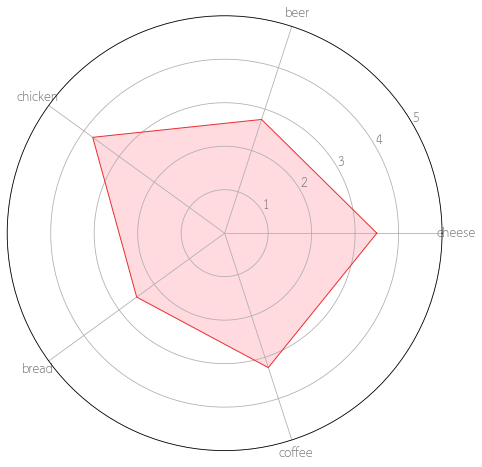

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

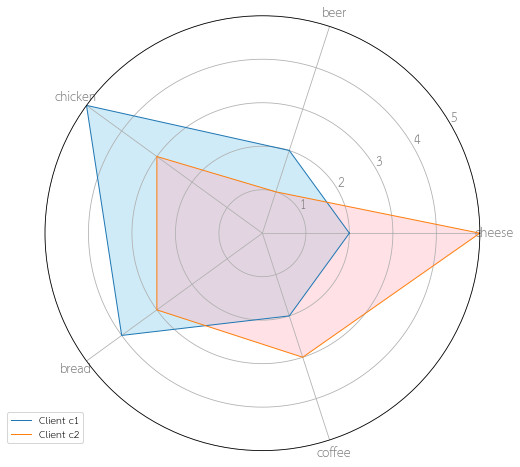

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Radar chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Dataviz_2024_DATA/IMDb Movies India.csv'

In [ ]:
Movie_india = pd.read_csv(path, encoding='latin-1')
Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Movie_india['Duration'] = Movie_india['Duration'].str.replace(' min', '')
Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Movie_india['Year'] = Movie_india['Year'].str.replace('(', '')
Movie_india['Year'] = Movie_india['Year'].str.replace(')', '')
Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def split_genres(row):
  # Check if the genre value is a string before splitting
  if isinstance(row['Genre'], str):
    genres = row['Genre'].split(',')
    return [genre.strip() for genre in genres]
  else:
    # Handle cases where the genre is not a string (e.g., return an empty list or NaN)
    return []
Movie_india['Genre'] = Movie_india.apply(split_genres, axis=1)

# Function to split genres and create new rows
def split_genres(row):
  if isinstance(row['Genre'], list):
    new_rows = []
    for i in range(len(row['Genre'])):
      new_row = row.copy()
      new_row['Genre'] = row['Genre'][i]
      new_rows.append(new_row)
    return new_rows
  else:
    return [row]


In [ ]:
# Apply the function to split genres and create new rows
new_Movie_india = pd.concat([pd.DataFrame(split_genres(row)) for _, row in Movie_india.iterrows()], ignore_index=True)
new_Movie_india = new_Movie_india.dropna(subset=['Rating','Votes'])
new_Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
# ตรวจสอบและแปลงคอลัมน์ Year เป็นชนิดข้อมูลที่ถูกต้อง
new_Movie_india['Year'] = pd.to_numeric(new_Movie_india['Year'], errors='coerce')  # แปลงเป็นตัวเลข หากไม่สามารถแปลงได้จะให้ค่า NaN
new_Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
# ลบแถวที่มีค่าปีเป็น NaN (ไม่สามารถแปลงได้)
new_Movie_india = new_Movie_india.dropna(subset=['Year'])
new_Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
# สร้างคอลัมน์ 'Era' ใน DataFrame
new_Movie_india['Era'] = new_Movie_india['Year'].apply(assign_era)
new_Movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2001-2023
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2001-2023
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2001-2023
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1981-2000
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1981-2000
...,...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1981-2000
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1981-2000
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1981-2000
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,1981-2000


In [ ]:
# ตรวจสอบข้อมูล
print(new_Movie_india[['Year', 'Era']].head())

   Year        Era
1  2019  2001-2023
4  2019  2001-2023
5  2019  2001-2023
7  1997  1981-2000
8  1997  1981-2000


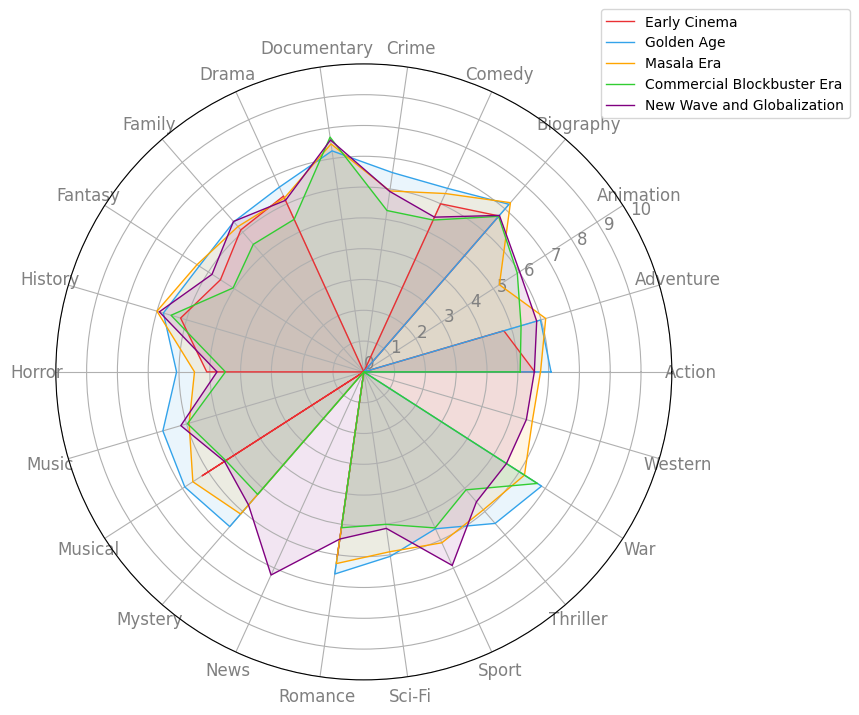

In [ ]:
import math  # ใช้ในการคำนวณมุมของแกนกราฟ radar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming your dataset 'new_md' has columns 'Release_Year', 'Genre', and 'Rating'


# สร้างฟังก์ชันในการแบ่งยุคภาพยนตร์
def assign_era(release_year):
    if release_year < 1940:
        return 'Early Cinema'
    elif 1940 <= release_year < 1970:
        return 'Golden Age'
    elif 1970 <= release_year < 1990:
        return 'Masala Era'
    elif 1990 <= release_year < 2010:
        return 'Commercial Blockbuster Era'
    else:
        return 'New Wave and Globalization'


# สร้างคอลัมน์ 'Era' ใน DataFrame
new_Movie_india['Era'] = new_Movie_india['Year'].apply(assign_era)


# คำนวณค่าเฉลี่ย Rating ของแต่ละ Genre ในแต่ละยุค
era_genre_rating = new_Movie_india.groupby(['Era', 'Genre'])['Rating'].mean().unstack()


era_genre_rating = era_genre_rating.fillna(0)  # หรือใช้วิธีที่เหมาะสม


# เลือก Genre ที่ต้องการสร้างกราฟ (คุณสามารถปรับตามที่ต้องการ)
selected_genres = era_genre_rating.columns.tolist()


# เตรียมข้อมูลสำหรับแต่ละยุค
eras = ['Early Cinema', 'Golden Age', 'Masala Era', 'Commercial Blockbuster Era', 'New Wave and Globalization']
values = []




for era in eras:
    # ดึงค่าเฉลี่ย Rating สำหรับแต่ละยุค
    era_values = era_genre_rating.loc[era, selected_genres].tolist()
    values.append(era_values)


# ปิดลูปของแต่ละค่าเพื่อสร้างกราฟ radar chart
values = [v + v[:1] for v in values]
angles = [n / float(len(selected_genres)) * 2 * math.pi for n in range(len(selected_genres))]
angles += angles[:1]


# สร้าง radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))


# เพิ่มแกนและ grid
plt.xticks(angles[:-1], selected_genres, color='grey', size=12)
plt.yticks(np.arange(0, 11, 1), [str(i) for i in range(0, 11, 1)], color='grey', size=12)
plt.ylim(0, 10)
ax.set_rlabel_position(30)


# Plot ค่าเฉลี่ย Rating สำหรับแต่ละยุค
colors = ['#ea3033', '#33a3ea', '#ffa500', '#32cd32', '#800080']
for i, era in enumerate(eras):
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=era, color=colors[i])
    ax.fill(angles, values[i], colors[i], alpha=0.1)


# เพิ่ม legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


# แสดงกราฟ
plt.show()

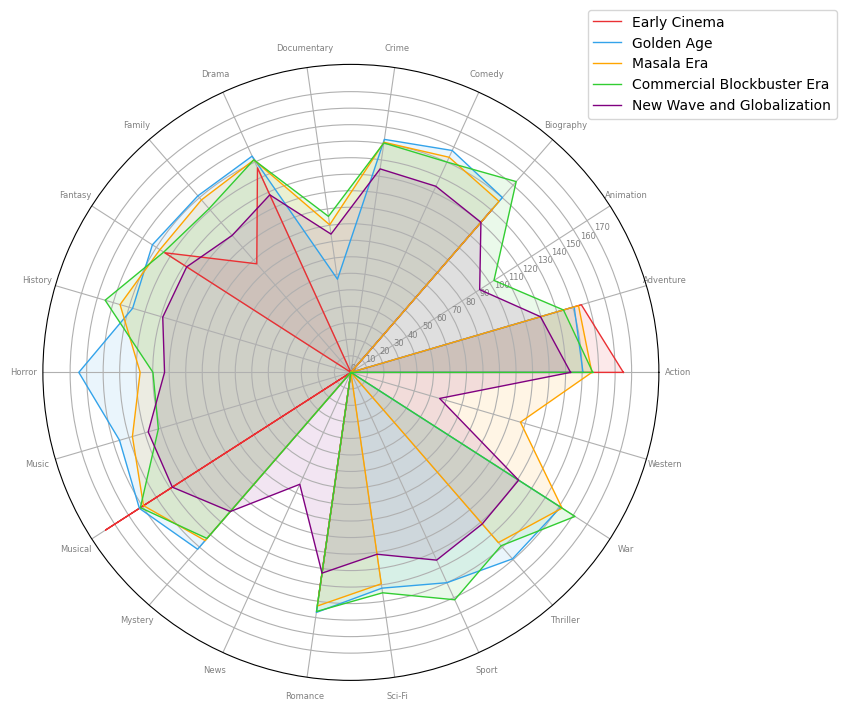

In [ ]:
import math  # ใช้ในการคำนวณมุมของแกนกราฟ radar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming your dataset 'new_md' has columns 'Release_Year', 'Genre', and 'Duration'


# สร้างฟังก์ชันในการแบ่งยุคภาพยนตร์
def assign_era(release_year):
    if release_year < 1940:
        return 'Early Cinema'
    elif 1940 <= release_year < 1970:
        return 'Golden Age'
    elif 1970 <= release_year < 1990:
        return 'Masala Era'
    elif 1990 <= release_year < 2010:
        return 'Commercial Blockbuster Era'
    else:
        return 'New Wave and Globalization'


# แปลงคอลัมน์ Duration ให้เป็นตัวเลข
new_Movie_india['Duration'] = pd.to_numeric(new_Movie_india['Duration'], errors='coerce')


# ลบแถวที่มีค่า NaN ในคอลัมน์ Duration
new_Movie_indiam = new_Movie_india.dropna(subset=['Duration'])


# สร้างคอลัมน์ 'Era' ใน DataFrame ด้วยการใช้ .loc เพื่อแก้ไขปัญหา SettingWithCopyWarning
new_Movie_indiam.loc[:, 'Era'] = new_Movie_indiam['Year'].apply(assign_era)


# คำนวณค่าเฉลี่ย Duration ของแต่ละ Genre ในแต่ละยุค
era_genre_duration = new_Movie_indiam.groupby(['Era', 'Genre'])['Duration'].mean().unstack()


era_genre_duration = era_genre_duration.fillna(0)  # หรือใช้วิธีที่เหมาะสม


# เลือก Genre ที่ต้องการสร้างกราฟ (คุณสามารถปรับตามที่ต้องการ)
selected_genres = era_genre_duration.columns.tolist()


# เตรียมข้อมูลสำหรับแต่ละยุค
eras = ['Early Cinema', 'Golden Age', 'Masala Era', 'Commercial Blockbuster Era', 'New Wave and Globalization']
values = []


for era in eras:
    # ดึงค่าเฉลี่ย Duration สำหรับแต่ละยุค
    era_values = era_genre_duration.loc[era, selected_genres].tolist()
    values.append(era_values)


# ปิดลูปของแต่ละค่าเพื่อสร้างกราฟ radar chart
values = [v + v[:1] for v in values]
angles = [n / float(len(selected_genres)) * 2 * math.pi for n in range(len(selected_genres))]
angles += angles[:1]


# สร้าง radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))


# เพิ่มแกนและ grid
plt.xticks(angles[:-1], selected_genres, color='grey', size=6)
plt.yticks(np.arange(0, max(map(max, values)) + 1, 10), color='grey', size=6)  # ปรับค่า y ให้สัมพันธ์กับค่า Duration
plt.ylim(0, max(map(max, values)) + 10)  # ขยายช่วง y ตามค่า Duration
ax.set_rlabel_position(30)


# Plot ค่าเฉลี่ย Duration สำหรับแต่ละยุค
colors = ['#ea3033', '#33a3ea', '#ffa500', '#32cd32', '#800080']
for i, era in enumerate(eras):
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=era, color=colors[i])
    ax.fill(angles, values[i], colors[i], alpha=0.1)


# เพิ่ม legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


# แสดงกราฟ
plt.show()
